# United States - Crime Rates - 1960 - 2014

### Introduction:

This time you will create a data

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [103]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv).

### Step 3. Assign it to a variable called crime.

In [104]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [105]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [106]:
crime['Year'] = pd.to_datetime(crime['Year'], format='%Y')

### Step 6. Set the Year column as the index of the dataframe

In [107]:
crime.set_index('Year',inplace=True)

### Step 7. Delete the Total column

In [108]:
crime.drop('Total', axis=1, inplace=True)

### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [109]:
crime['decade'] = crime.index.year // 10*10
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,decade
Year,,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,1960
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,1960
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,1960
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,1960
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,1960


In [110]:
decade1 = crime.groupby('decade').agg({'Population':'last',
                             'Violent':'mean',
                             'Property':'mean',
                             'Murder':'mean',
                             'Forcible_Rape':'mean',
                             'Robbery':'mean',
                             'Aggravated_assault':'mean',
                             'Burglary':'mean',
                             'Larceny_Theft':'mean',
                             'Vehicle_Theft':'mean',

                            })

In [116]:
agg_dict = {'Population': 'last'}
agg_dict.update(dict.fromkeys(crime.columns[1:], 'sum'))
agg_dict['Population'] = ['last', 'size']
df_decade = crime.groupby('decade').agg(agg_dict)
df_decade.head()

Population        Violent   Property  Murder Forcible_Rape  Robbery  \
             last size       sum        sum     sum           sum      sum   
decade                                                                       
1960    201385000   10   4134930   45160900  106180        236720  1633510   
1970    220099000   10   9607930   91383800  192230        554570  4159020   
1980    248239000   10  14074328  117048900  206439        865639  5383109   
1990    272690813   10  17527048  119053499  211664        998827  5748930   
2000    307006550   10  13968056  100944369  163068        922499  4230366   

       Aggravated_assault  Burglary Larceny_Theft Vehicle_Theft decade  
                      sum       sum           sum           sum    sum  
decade                                                                  
1960              2158520  13321100      26547700       5292100  19600  
1970              4702120  28486000      53157800       9739900  19700  
1980              7619130  33073494      72040253      11935411  19800  
1990             10568963  26750015      77679366      14624418  19900  
2000              8652124  21565176      67970291      11412834  20000

### Step 9. What is the most dangerous decade to live in the US?

In [117]:
df_decade.iloc[:,1:].T.sum().T.sort_values(ascending=False).head(1)

decade
1990    273182640
dtype: int64

In [121]:
df_decade.loc[:,('Violent','Sum'):('Vehicle_Theft','Sum')]

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft
,sum,sum,sum,sum,sum,sum,sum,sum
decade,,,,,,,,
1960,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700
1970,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800
1980,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253
1990,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366
2000,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291
2010,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698


In [124]:
df_decade.loc[:,('Population','last')]

decade
1960    201385000
1970    220099000
1980    248239000
1990    272690813
2000    307006550
2010    318857056
Name: (Population, last), dtype: int64

In [126]:
df_decade.loc[:,('Population','size')]

decade
1960    10
1970    10
1980    10
1990    10
2000    10
2010     5
Name: (Population, size), dtype: int64

In [130]:
trends = df_decade.loc[:,('Violent','Sum'):('Vehicle_Theft','Sum')].div(df_decade.loc[:,('Population','last')],axis=0).mul(df_decade.loc[:,('Population','size')],axis=0)

<Axes: xlabel='decade'>

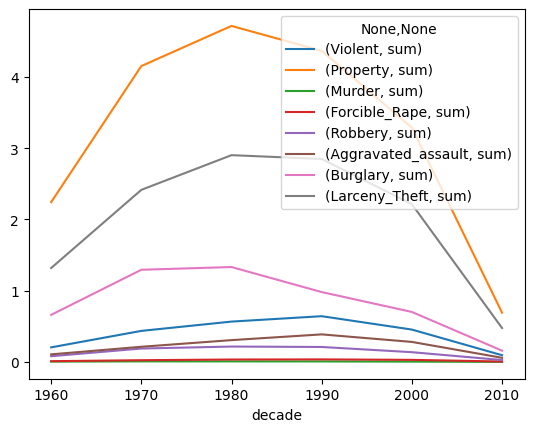

In [131]:
trends.plot()